In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [129]:
from matplotlib import font_manager, rc            # 그래프의 한글 폰트 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [130]:
#파일 불러오기
df1 = pd.read_csv(r'C:\Users\zzhwa\Downloads\corona\coronavirusdataset_20200601\PatientInfo.csv')
df1.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [136]:
# df1.info()                                           # 전체 정보 파악(나이와 나라정보 파악 / 나이(3525/4004), 나라(4004/4004) )
# df1['country'].value_counts()                        # 한국인 숫자 파악 (한국인 : 3974명)

df_columns = df1[['age', 'country']]                   # df1에서 'age','country' 컬럼만 빼서 데이터를 만듦. 
df_columns_k = df_columns['country'] == 'Korea'        # 한국인만 있는 데이터를 추출
df_korea = df_columns[df_columns_k]                    # 조건을 충족하는 데이터를 필터링하여 새로운 변수에 저장함. (3974)
df_korea.dropna(axis=0)                                # 결측값 있는 행 제거 (3495)

,age,country
0,50s,Korea
1,30s,Korea
2,50s,Korea
3,20s,Korea
4,20s,Korea
...,...,...
3998,20s,Korea
3999,20s,Korea
4000,30s,Korea
4001,20s,Korea


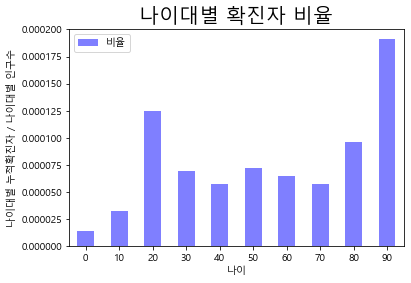

In [200]:
df_korea.age = df_korea.age.str.replace('s','',regex=True)   # 나이에서 's'를 없애주는 전처리.

age_counts = df_korea.age.value_counts()               # 연령별 합계를 알아봄.
ac = pd.DataFrame(age_counts)                          # 연령별 합계를 데이터프레임으로 만듦.
ac.columns = ['age_sum']                               # 'age'컬럼을 'age_sum'으로 바꿈.

ac_sort = ac.sort_index()
ac_sort
ac_sort_d_100 = ac_sort.drop('100')                    #3번째 index 제거
ac_sort_d_100
# # new_data = {'100' : '1'}
# # ac_sort_a_100 = ac_sort_d_100.append(new_data, ignore_index=True)
# # ac_sort_a_100


# 열에 'age_po'를 추가함(나이별 인구수). / http://27.101.213.4/index.jsp#   (링크를 참고해 나이별 인구수를 가져옴.)
ac_sort_d_100.loc[:,'age_po'] =[4103848, 4887408, 6802925, 6995799, 8362127, 8661935, 6456674, 3632966, 1676737, 246192]
# ac_sort_d_100.dtypes                                                        # 타입 확인.
# ac_sort_d_100['age_po'] = ac_sort_d_100['age_po'].apply(pd.to_numeric)        # 문자를 정수화 변환시켜 주기.
# ac_sort_d_100.dtypes 

# # 나이대별 확진자 비율 = 나이대별 누적확진자 / 나이대별 인구수
ac_sort_d_100['age_con'] = ac_sort_d_100['age_sum'] / ac_sort_d_100['age_po'] 
ac_sort_d_100

ac_sort_d_100['age_con'].plot.bar(color='blue', alpha= 0.5, label = '비율')
# ac_sort_d_100 = ac_sort_d_100.rename(columns={"age_con" : "비율"})
plt.xticks(rotation=0)
plt.xlabel("나이")
plt.ylabel("나이대별 누적확진자 / 나이대별 인구수")
plt.title("나이대별 확진자 비율", fontsize = 20)
plt.legend(loc=0)
plt.show()